# IMPORTS

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler as ss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as le
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import GridSearchCV as gscv
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# DATA PRE-PROCESSING

## Taking input and distribution

In [5]:
data0=pd.read_csv('output.csv',names=(['length', 'alpha', 'beta', 'flux', 'ja']+[f'ms{i}' for i in range(1,201)]+['max1', 'min1', 'max2', 'min2']))
data=data0.drop_duplicates()
data=data.reset_index(drop=True)
data

,length,alpha,beta,flux,ja,ms1,ms2,ms3,ms4,ms5,...,ms195,ms196,ms197,ms198,ms199,ms200,max1,min1,max2,min2
0,0.069902,0.812113,38.438948,-1.681073,323.685434,1,0,0,1,0,...,0,0,1,1,0,0,8761.048455,8724.831598,17645.703943,17325.571800
1,0.016766,25.363305,39.369244,2.620376,934.456130,1,0,0,0,1,...,0,0,0,1,0,0,30261.819111,27673.873145,58485.735757,57169.840233
2,0.088336,0.141976,34.026161,-2.174854,821.765815,0,0,1,1,1,...,0,0,1,1,0,0,5705.949563,5340.270545,11285.606444,10805.147664
3,0.062271,11.061218,8.642271,-4.835824,517.301044,0,1,1,0,0,...,1,1,1,1,0,1,4935.107964,4670.055929,9940.021351,9287.187535
4,0.063165,28.651174,36.922439,0.082215,865.096945,0,1,1,1,0,...,0,1,1,0,0,0,492.969310,477.546060,990.839622,948.770304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.096404,22.798822,14.473361,0.154883,49.339827,1,1,1,1,0,...,0,0,1,0,0,1,406.561256,390.708672,805.502554,787.732198
3996,0.050215,5.248490,17.668096,0.573389,475.004608,1,0,0,0,0,...,0,1,0,0,1,1,4994.390641,4862.627123,10073.970746,9633.634253
3997,0.040185,44.816921,27.458135,-0.346343,172.152538,1,0,0,0,0,...,1,1,0,1,1,0,1803.331343,1783.673945,3717.884642,3450.073022
3998,0.052694,1.293693,3.679471,1.579100,653.966227,0,1,0,1,0,...,0,1,0,1,1,0,1689.320337,1673.902295,3391.765202,3334.637079


In [38]:
data.describe()

,length,alpha,beta,flux,ja,ms1,ms2,ms3,ms4,ms5,...,ms195,ms196,ms197,ms198,ms199,ms200,max1,min1,max2,min2
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,0.050655,24.837352,25.025481,-0.010348,501.744299,0.497875,0.502500,0.501875,0.503375,0.493000,...,0.497375,0.493500,0.508000,0.492500,0.493375,0.499750,1.539884e+04,1.469745e+04,3.088142e+04,2.931812e+04
std,0.028533,14.421850,14.281687,2.883734,286.959138,0.500027,0.500025,0.500028,0.500020,0.499982,...,0.500024,0.499989,0.499967,0.499975,0.499987,0.500031,4.290560e+04,4.134250e+04,8.604494e+04,8.246202e+04
min,0.001001,0.050830,0.051904,-4.997874,2.249487,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.962088e+02,1.697549e+02,3.832233e+02,3.502090e+02
25%,0.025908,12.350906,12.825695,-2.509365,254.703431,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.578497e+03,2.431961e+03,5.164512e+03,4.864389e+03
50%,0.050864,24.808053,25.285875,-0.043186,501.986265,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.385289e+03,5.109846e+03,1.078508e+04,1.019966e+04
75%,0.075264,37.166698,37.323738,2.519099,750.011803,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.212018e+04,1.157963e+04,2.433964e+04,2.309805e+04
max,0.099986,49.998850,49.998061,4.994040,999.743816,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.115231e+06,1.058974e+06,2.202406e+06,2.142697e+06


C:\Users\Anshu raj\AppData\Local\Temp\ipykernel_1324\740266207.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[j],color='green')
C:\Users\Anshu raj\AppData\Local\Temp\ipykernel_1324\740266207.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[j],color='green')
C:\Users\Anshu raj\A

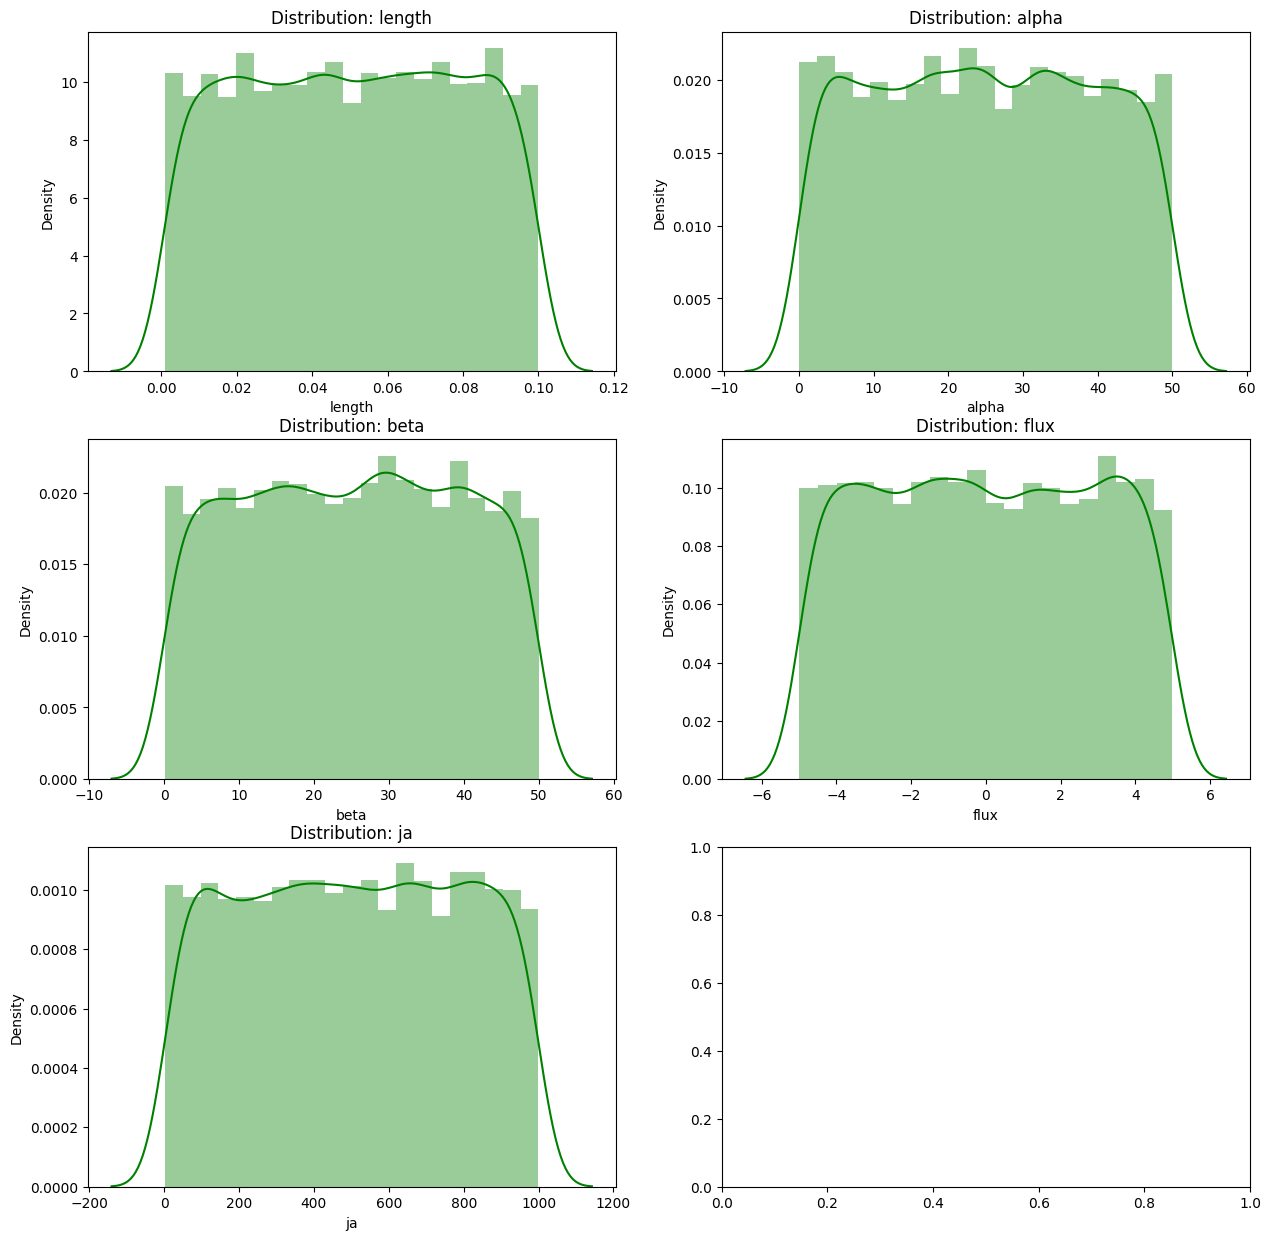

In [39]:
column=['length', 'alpha', 'beta', 'flux', 'ja']
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))
for i,j in enumerate(column):
    plt.subplot(3,2,i+1)
    sns.distplot(data[j],color='green')
    plt.title(f"Distribution: {j}")
plt.show()

## Data -- Feature correlation with target variables

In [40]:
corr=data.corr()
k=corr[['length', 'alpha', 'beta', 'flux', 'ja']]['max1':]
k.insert(5,"microstructure",corr[[f'ms{j}' for j in range(1,201)]]['max1':].mean(axis=1))
k, k.mean()

(        length     alpha      beta      flux        ja  microstructure
 max1 -0.363795 -0.175355  0.130618  0.105679  0.018201        0.000334
 min1 -0.360048 -0.177822  0.129638  0.104618  0.018283        0.000412
 max2 -0.363885 -0.175594  0.130707  0.105427  0.017913        0.000324
 min2 -0.360024 -0.177580  0.129551  0.104860  0.018522        0.000420,
 length           -0.361938
 alpha            -0.176588
 beta              0.130129
 flux              0.105146
 ja                0.018230
 microstructure    0.000373
 dtype: float64)

## PCA on pure non-modified data with tts

array([ 99.43216328,  99.68375188,  99.92960737,  99.93965517,
        99.94005843,  99.94045572,  99.94085208,  99.94124458,
        99.94163641,  99.94202741,  99.94241514,  99.9428008 ,
        99.94318579,  99.94356842,  99.94394882,  99.94432847,
        99.94470723,  99.94508471,  99.94546008,  99.94583479,
        99.94620858,  99.9465805 ,  99.94695114,  99.94732041,
        99.94768888,  99.9480566 ,  99.94842279,  99.9487881 ,
        99.94915257,  99.94951543,  99.949878  ,  99.95023924,
        99.95059959,  99.95095946,  99.95131766,  99.95167529,
        99.95203259,  99.95238889,  99.95274452,  99.95309856,
        99.9534517 ,  99.95380386,  99.95415499,  99.95450508,
        99.95485366,  99.9552018 ,  99.95554846,  99.95589448,
        99.95623972,  99.95658319,  99.95692594,  99.95726765,
        99.95760856,  99.95794888,  99.95828842,  99.95862777,
        99.9589663 ,  99.95930337,  99.95963876,  99.95997359,
        99.9603078 ,  99.96064121,  99.96097374,  99.96

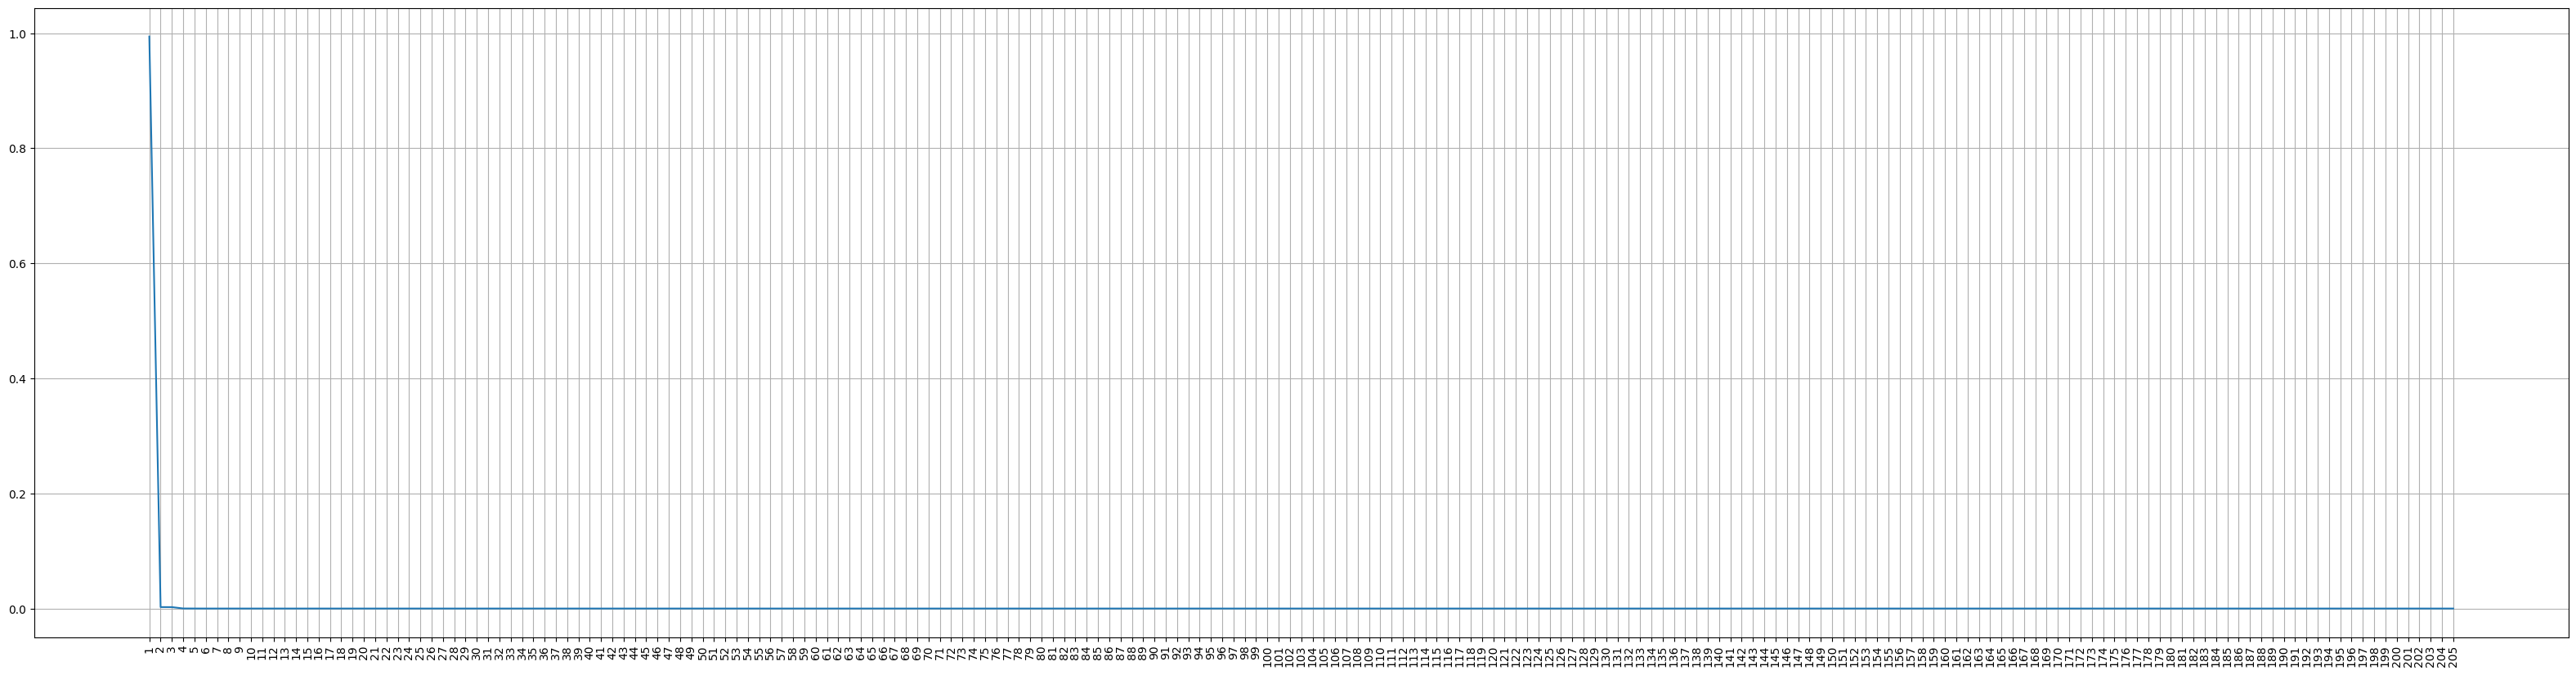

In [41]:
col=['max1','min1','max2','min2']
X=data.drop(columns=col)
pca = PCA()
principal_components = pca.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)
cumulative_variance_percentage = cumulative_variance * 100
plt.figure(figsize=(40,10))
sns.lineplot(y=variance_ratio,x=np.linspace(1,205,205))
plt.xticks(np.linspace(1,205,205),np.linspace(1,205,205).astype(int),rotation=90)
plt.grid(True)
cumulative_variance_percentage

In [42]:
pca=PCA(n_components=2)
data_pca=pd.DataFrame(pca.fit_transform(X),columns=['x1','x2'])
for i in col:
    data_pca[i]=data[i]
data_pca

,x1,x2,max1,min1,max2,min2
0,-131.351590,24.787347,1796.000854,1654.771026,3613.337742,3305.212915
1,-86.131735,17.521157,1233.971291,1105.635777,2464.261403,2228.446658
2,-217.179280,8.831939,3297.337733,3282.447970,6896.681903,6286.698912
3,-343.747581,-5.516064,12469.548731,11327.556295,24769.068850,22833.007909
4,-270.640802,-2.158260,2894.966989,2588.495364,5551.941588,5405.104199
...,...,...,...,...,...,...
7995,-7.161198,-10.558632,3289.106310,3143.049944,6704.036423,6171.571240
7996,497.997078,15.101145,1258.044081,1174.935992,2466.202447,2391.019785
7997,264.579474,7.855378,1866.364148,1801.097997,3775.425184,3552.769625
7998,472.501142,-12.594968,22087.583848,20603.146579,43142.565411,42145.985757


In [43]:
X=data_pca.drop(columns=col).to_numpy()
max1=data_pca['max1'].to_numpy()
min1=data_pca['min1'].to_numpy()
max2=data_pca['max2'].to_numpy()
min2=data_pca['min2'].to_numpy()
x_max1_data_train, x_max1_data_test, max1_data_train, max1_data_test = tts(X,max1,test_size=0.2)
x_min1_data_train, x_min1_data_test, min1_data_train, min1_data_test = tts(X,min1,test_size=0.2)
x_max2_data_train, x_max2_data_test, max2_data_train, max2_data_test = tts(X,max2,test_size=0.2)
x_min2_data_train, x_min2_data_test, min2_data_train, min2_data_test = tts(X,min2,test_size=0.2)

## Normalising the data & PCA with tts

In [44]:
data_Normalise=data.copy(deep=True)
colnew=['length','alpha','beta','flux','ja']
for i in colnew:
    data_Normalise[i] = (data_Normalise[i] - data_Normalise[i].min()) / (data_Normalise[i].max() - data_Normalise[i].min())
data_Normalise

,length,alpha,beta,flux,ja,ms1,ms2,ms3,ms4,ms5,...,ms195,ms196,ms197,ms198,ms199,ms200,max1,min1,max2,min2
0,0.814839,0.905811,0.126958,0.913902,0.632430,0,0,1,1,1,...,1,1,0,1,1,0,1796.000854,1654.771026,3613.337742,3305.212915
1,0.939135,0.875961,0.550161,0.622766,0.587092,0,0,0,0,1,...,1,1,1,0,0,0,1233.971291,1105.635777,2464.261403,2228.446658
2,0.530936,0.654455,0.407612,0.820432,0.718473,1,1,0,0,1,...,1,1,1,1,0,1,3297.337733,3282.447970,6896.681903,6286.698912
3,0.227869,0.498097,0.900884,0.574913,0.845357,1,1,0,1,0,...,1,0,0,0,1,1,12469.548731,11327.556295,24769.068850,22833.007909
4,0.789475,0.367651,0.206006,0.086524,0.772075,0,0,1,0,1,...,1,0,0,0,1,0,2894.966989,2588.495364,5551.941588,5405.104199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.607087,0.354379,0.771301,0.559629,0.507928,0,1,0,1,0,...,0,1,1,0,0,0,3289.106310,3143.049944,6704.036423,6171.571240
7996,0.799996,0.887539,0.772873,0.807929,0.001493,1,0,0,1,0,...,1,0,1,1,1,0,1258.044081,1174.935992,2466.202447,2391.019785
7997,0.289675,0.521328,0.021794,0.436658,0.235510,1,1,0,1,0,...,1,1,1,1,1,0,1866.364148,1801.097997,3775.425184,3552.769625
7998,0.162540,0.256172,0.584007,0.098564,0.027064,1,1,1,1,1,...,1,0,1,1,1,1,22087.583848,20603.146579,43142.565411,42145.985757


array([  0.66300466,   1.31632429,   1.96759345,   2.61298511,
         3.2567986 ,   3.89950945,   4.53670702,   5.17120491,
         5.80412917,   6.43307678,   7.05844178,   7.68258351,
         8.30516265,   8.92578353,   9.54297806,  10.15897158,
        10.77329342,  11.38478716,  11.99426137,  12.60098333,
        13.20663879,  13.81102329,  14.41299483,  15.01332116,
        15.61223578,  16.20870629,  16.80449721,  17.39844391,
        17.99051279,  18.58226062,  19.17114668,  19.7593698 ,
        20.34657238,  20.9319667 ,  21.51640253,  22.09823138,
        22.67851477,  23.25721824,  23.83451194,  24.40984466,
        24.98284064,  25.55515036,  26.12516225,  26.6943037 ,
        27.26217621,  27.82683097,  28.39059729,  28.95217065,
        29.51281127,  30.07242424,  30.6309119 ,  31.18873401,
        31.74504271,  32.29903289,  32.85021507,  33.40090743,
        33.95041159,  34.49842457,  35.04526209,  35.59121293,
        36.13456146,  36.67665318,  37.21751128,  37.75

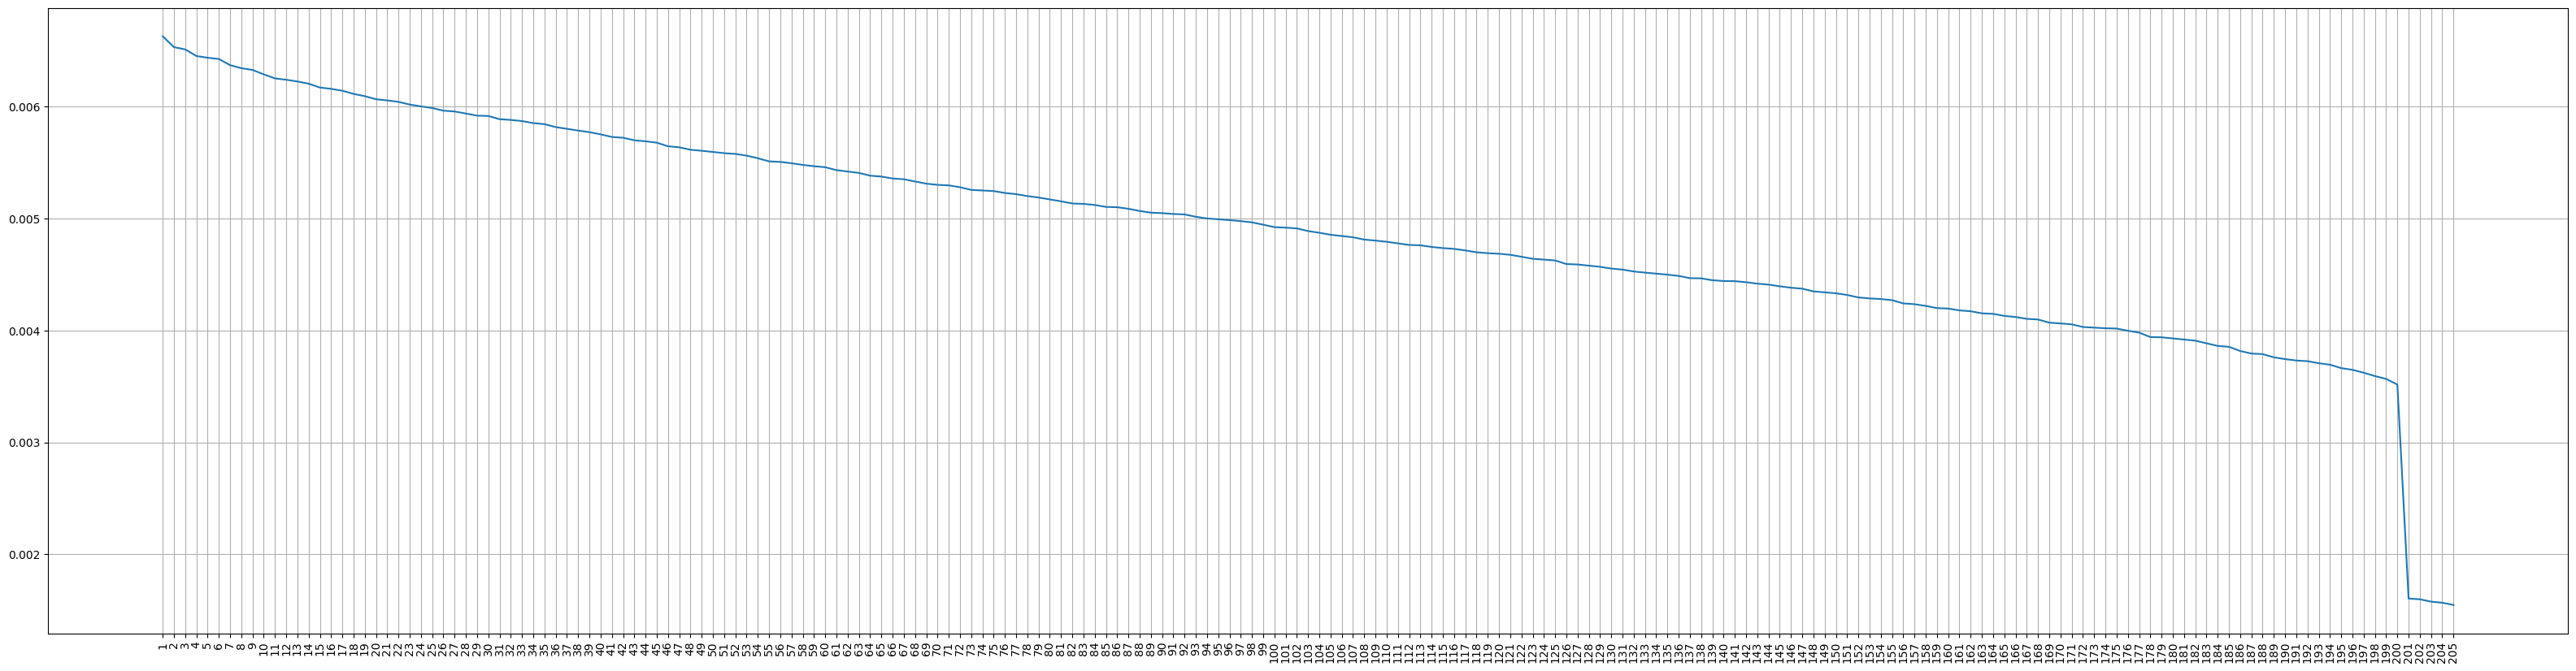

In [45]:
X=data_Normalise.drop(columns=col)
pca = PCA()
principal_components = pca.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)
cumulative_variance_percentage = cumulative_variance * 100
plt.figure(figsize=(40,10))
sns.lineplot(y=variance_ratio,x=np.linspace(1,205,205))
plt.xticks(np.linspace(1,205,205),np.linspace(1,205,205).astype(int),rotation=90)
plt.grid(True)
cumulative_variance_percentage

In [46]:
pca=PCA(n_components=201)
data_Normalise_pca=pd.DataFrame(pca.fit_transform(X),columns=[f'x{i}' for i in range(1,202)])
for i in col:
    data_Normalise_pca[i]=data_Normalise[i]
data_Normalise_pca

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x196,x197,x198,x199,x200,x201,max1,min1,max2,min2
0,0.636651,0.799959,0.254195,-0.060306,-0.601803,-0.514686,0.162221,-0.572041,-0.580062,-0.414267,...,0.074710,-0.865032,-0.635585,-1.273239,-0.313754,0.229103,1796.000854,1654.771026,3613.337742,3305.212915
1,-0.619401,-0.250884,-0.181259,-1.026929,1.122531,-0.613295,0.631566,0.194953,0.106206,0.313930,...,0.822003,0.757109,0.510205,0.160517,-0.124083,0.126597,1233.971291,1105.635777,2464.261403,2228.446658
2,-0.475555,-0.219882,0.108403,-0.176778,0.134703,0.333426,-0.206473,-0.464616,-0.305518,-0.717365,...,0.473169,-0.597468,0.281611,-0.060036,0.385956,0.201270,3297.337733,3282.447970,6896.681903,6286.698912
3,0.269885,0.051652,0.318758,-0.345164,-0.205950,-0.110805,-0.365514,-1.195313,-0.898870,0.131700,...,-0.172680,0.267830,-0.080945,0.563084,-0.350226,-0.096940,12469.548731,11327.556295,24769.068850,22833.007909
4,-0.802654,-0.592126,0.507698,-0.191919,-0.420856,0.586370,0.269996,0.200408,0.119668,-0.558804,...,0.249431,0.139697,0.360504,0.350629,-0.066853,-0.158197,2894.966989,2588.495364,5551.941588,5405.104199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.205123,0.214876,0.809995,1.300554,-0.687459,-0.744559,-0.265474,0.465352,0.236746,-0.725145,...,0.421980,-0.026866,0.288664,0.859556,-0.495978,0.237484,3289.106310,3143.049944,6704.036423,6171.571240
7996,0.065217,-0.195508,0.369284,0.404405,-0.606128,0.308561,-0.110877,-0.592053,0.226885,-0.497219,...,-0.486191,-0.545709,-0.086135,-0.401965,0.104845,0.177404,1258.044081,1174.935992,2466.202447,2391.019785
7997,0.247461,0.082468,-0.012329,-0.093118,0.771412,0.425890,0.370530,0.249855,-0.834685,0.583871,...,0.437229,0.083749,-0.351752,-0.732779,0.157641,-0.286783,1866.364148,1801.097997,3775.425184,3552.769625
7998,0.601764,-0.195024,0.016696,-1.001393,0.021858,0.164587,0.482405,0.401945,0.001626,0.438439,...,-0.576509,0.218071,-0.524409,-0.456677,0.345421,-0.361350,22087.583848,20603.146579,43142.565411,42145.985757


In [47]:
X=data_Normalise_pca.drop(columns=col).to_numpy()
max1=data_Normalise_pca['max1'].to_numpy()
min1=data_Normalise_pca['min1'].to_numpy()
max2=data_Normalise_pca['max2'].to_numpy()
min2=data_Normalise_pca['min2'].to_numpy()
x_max1_data_Normalise_train, x_max1_data_Normalise_test, max1_data_Normalise_train, max1_data_Normalise_test = tts(X,max1,test_size=0.2)
x_min1_data_Normalise_train, x_min1_data_Normalise_test, min1_data_Normalise_train, min1_data_Normalise_test = tts(X,min1,test_size=0.2)
x_max2_data_Normalise_train, x_max2_data_Normalise_test, max2_data_Normalise_train, max2_data_Normalise_test = tts(X,max2,test_size=0.2)
x_min2_data_Normalise_train, x_min2_data_Normalise_test, min2_data_Normalise_train, min2_data_Normalise_test = tts(X,min2,test_size=0.2)

## Creating data1
10 new 20-length string vectors for 200-length Microstructure

In [6]:
data1=data.copy(deep=True)
col_ms=[f'ms{i}' for i in range(1,201)]
data1=data1.drop(columns=col_ms)

In [7]:
for i in range(1, 21):
    data1["ms" + f"{i}"] = ""

In [8]:
for k in range(len(data)):
    temp=0
    for i in range(1,21):
        string_temp=""
        for j in range(1,11):
            string_temp+=data['ms'+f"{temp+j}"][k].astype('str')
        data1["ms"+f"{i}"][k]=string_temp
        temp=temp+10
data1

C:\Users\shriv\AppData\Local\Temp\ipykernel_15696\3071494822.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["ms"+f"{i}"][k]=string_temp


,length,alpha,beta,flux,ja,max1,min1,max2,min2,ms1,...,ms11,ms12,ms13,ms14,ms15,ms16,ms17,ms18,ms19,ms20
0,0.069902,0.812113,38.438948,-1.681073,323.685434,8761.048455,8724.831598,17645.703943,17325.571800,1001000000,...,1111001110,0100001001,0101001001,0111001010,0101000011,1110010101,0011011110,1111011010,1111000010,1110001100
1,0.016766,25.363305,39.369244,2.620376,934.456130,30261.819111,27673.873145,58485.735757,57169.840233,1000100101,...,1001111010,1111100010,1110010010,1000010100,0010111010,0001000010,0011111000,1110100100,0100011010,1001000100
2,0.088336,0.141976,34.026161,-2.174854,821.765815,5705.949563,5340.270545,11285.606444,10805.147664,0011110011,...,1011100011,1011000011,1010101101,1111100101,1001000010,0111111110,1101001110,0110001100,1110001111,1100001100
3,0.062271,11.061218,8.642271,-4.835824,517.301044,4935.107964,4670.055929,9940.021351,9287.187535,0110011010,...,0000000111,0001010101,1010011101,1100011010,0000101000,1100001111,1011011111,1101011010,1101100101,1110111101
4,0.063165,28.651174,36.922439,0.082215,865.096945,492.969310,477.546060,990.839622,948.770304,0111011101,...,1001010001,1101010100,0100110100,0111110011,1000001111,1010100000,1110000111,0001110101,1010101000,0101011000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.096404,22.798822,14.473361,0.154883,49.339827,406.561256,390.708672,805.502554,787.732198,1111000111,...,0101110011,0111100000,0011011010,1110100010,0011100100,1010001111,0111000110,1111001110,0010011000,1011001001
3996,0.050215,5.248490,17.668096,0.573389,475.004608,4994.390641,4862.627123,10073.970746,9633.634253,1000001100,...,0000000000,0010011110,1110011000,0101010110,0101000011,1111101100,0101101100,0101110100,0000010111,0110010011
3997,0.040185,44.816921,27.458135,-0.346343,172.152538,1803.331343,1783.673945,3717.884642,3450.073022,1000001011,...,1000000100,1011011111,0100011101,1111110110,0000001001,1001110010,0011111100,1011100010,0110111000,1000110110
3998,0.052694,1.293693,3.679471,1.579100,653.966227,1689.320337,1673.902295,3391.765202,3334.637079,0101000011,...,0111010011,1010110110,1010111010,1111011011,1000110001,0001101100,1000011111,0001101101,0011101010,0000010110


In [ ]:
col_ms_new=[f'ms{i}' for i in range(1,21)]
data2=data.copy(deep=True)
for k in range(len(data)):
    for i in col_ms_new:
        strr=data1[i][k]
        data2[i][k]=int(strr,2)
data2        

In [9]:
label_encoder = le()
col_ms=[f'ms{i}' for i in range(1,21)]
for i in col_ms:
    data1[i] = label_encoder.fit_transform(data1[i])
data1

,length,alpha,beta,flux,ja,max1,min1,max2,min2,ms1,...,ms11,ms12,ms13,ms14,ms15,ms16,ms17,ms18,ms19,ms20
0,0.069902,0.812113,38.438948,-1.681073,323.685434,8761.048455,8724.831598,17645.703943,17325.571800,569,...,952,260,326,455,311,899,219,970,934,887
1,0.016766,25.363305,39.369244,2.620376,934.456130,30261.819111,27673.873145,58485.735757,57169.840233,542,...,623,970,899,529,179,65,245,917,275,570
2,0.088336,0.141976,34.026161,-2.174854,821.765815,5705.949563,5340.270545,11285.606444,10805.147664,240,...,724,691,676,984,560,499,835,388,884,760
3,0.062271,11.061218,8.642271,-4.835824,517.301044,4935.107964,4670.055929,9940.021351,9287.187535,405,...,7,84,661,786,39,768,725,844,842,936
4,0.063165,28.651174,36.922439,0.082215,865.096945,492.969310,477.546060,990.839622,948.770304,472,...,583,834,305,496,511,659,890,115,660,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.096404,22.798822,14.473361,0.154883,49.339827,406.561256,390.708672,805.502554,787.732198,949,...,366,470,216,917,220,642,448,958,151,695
3996,0.050215,5.248490,17.668096,0.573389,475.004608,4994.390641,4862.627123,10073.970746,9633.634253,517,...,0,155,905,340,311,985,359,364,23,395
3997,0.040185,44.816921,27.458135,-0.346343,172.152538,1803.331343,1783.673945,3717.884642,3450.073022,516,...,508,718,282,1001,9,613,249,727,427,556
3998,0.052694,1.293693,3.679471,1.579100,653.966227,1689.320337,1673.902295,3391.765202,3334.637079,318,...,460,678,688,974,544,106,536,107,229,22


## PCA on data1 with tts

array([  5.25930037,  10.48112286,  15.67266344,  20.68332325,
        25.65970291,  30.58635402,  35.48230657,  40.36434585,
        45.16335539,  49.93260442,  54.65141223,  59.34848339,
        63.99853817,  68.63055788,  73.23709365,  77.79992625,
        82.33412293,  86.83832548,  91.32486066,  95.70806506,
        99.97711284,  99.98845937,  99.99954675,  99.99999996,
       100.        ])

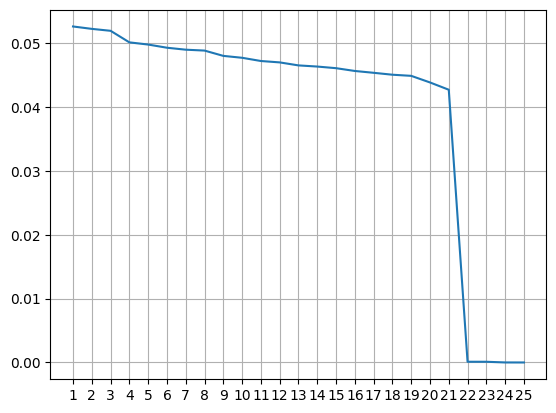

In [52]:
X=data1.drop(columns=col)
pca = PCA()
principal_components = pca.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)
cumulative_variance_percentage = cumulative_variance * 100
sns.lineplot(x=np.linspace(1,25,25), y=variance_ratio)
plt.xticks(np.linspace(1,25,25),np.linspace(1,25,25).astype(int))
plt.grid(True)
cumulative_variance_percentage

In [53]:
pca=PCA(n_components=22)
data1_pca=pd.DataFrame(pca.fit_transform(X),columns=[f'x{i}' for i in range(1,23)])
for i in col:
    data1_pca[i]=data1[i]
data1_pca

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,max1,min1,max2,min2
0,38.537076,480.923895,281.860618,75.569325,-16.672110,-347.109277,-431.948572,412.667780,-314.176483,173.928960,...,253.041168,-251.629871,-223.681678,128.062131,-148.725516,-23.334196,1796.000854,1654.771026,3613.337742,3305.212915
1,-362.953532,-539.412573,-194.449651,-331.633433,-266.889599,112.278453,-279.603078,320.747157,197.107094,-14.081680,...,391.304687,283.301688,-57.198596,141.427918,87.609842,-17.008547,1233.971291,1105.635777,2464.261403,2228.446658
2,-131.715574,682.377045,-382.422585,249.432307,-382.602278,3.641733,26.947336,367.566677,-232.272203,18.327285,...,189.338749,-352.318130,-82.149213,228.763964,-75.647317,-8.566512,3297.337733,3282.447970,6896.681903,6286.698912
3,-473.554949,271.634834,309.781764,364.927514,78.751343,-111.512495,328.163740,-444.512062,116.501147,71.094619,...,-633.816328,141.923012,3.893417,-107.422374,-463.069836,4.213943,12469.548731,11327.556295,24769.068850,22833.007909
4,63.610363,-142.224557,-78.289045,196.354837,-464.712405,-63.560098,12.405917,214.874235,273.964343,55.452106,...,185.149537,98.707021,-356.338325,-77.951474,-188.252609,1.939146,2894.966989,2588.495364,5551.941588,5405.104199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-236.305670,295.975819,262.984563,-111.827288,60.220878,0.315784,210.716360,592.947324,239.651931,-391.331982,...,-1.079756,-149.353948,101.544948,104.708431,-222.485946,9.578563,3289.106310,3143.049944,6704.036423,6171.571240
7996,239.138520,40.720408,-210.820548,-133.570481,549.773836,178.346890,111.627896,240.628157,-148.222017,-505.154311,...,88.914197,-1.221478,41.629609,-36.764935,603.390112,-15.334672,1258.044081,1174.935992,2466.202447,2391.019785
7997,208.078454,244.709965,143.065112,417.350740,224.183127,310.629457,27.226984,357.824938,297.593815,-197.168653,...,36.061319,-74.430745,375.776407,-257.085777,175.140900,-8.134697,1866.364148,1801.097997,3775.425184,3552.769625
7998,110.825137,-72.073141,-119.212737,142.030505,451.456652,865.801564,108.519839,246.306829,47.412790,-293.101693,...,125.185317,-152.778460,-335.930623,-579.652778,81.707543,11.316795,22087.583848,20603.146579,43142.565411,42145.985757


In [54]:
X=data1_pca.drop(columns=col).to_numpy()
max1=data1_pca['max1'].to_numpy()
min1=data1_pca['min1'].to_numpy()
max2=data1_pca['max2'].to_numpy()
min2=data1_pca['min2'].to_numpy()
x_max1_data1_train, x_max1_data1_test, max1_data1_train, max1_data1_test = tts(X,max1,test_size=0.2)
x_min1_data1_train, x_min1_data1_test, min1_data1_train, min1_data1_test = tts(X,min1,test_size=0.2)
x_max2_data1_train, x_max2_data1_test, max2_data1_train, max2_data1_test = tts(X,max2,test_size=0.2)
x_min2_data1_train, x_min2_data1_test, min2_data1_train, min2_data1_test = tts(X,min2,test_size=0.2)

## Normalising data1 & PCA with tts

In [55]:
data1_Normalise=data1.copy(deep=True)
colnew=col_ms+['length','alpha','beta','flux','ja']
for i in colnew:
    data1_Normalise[i] = (data1_Normalise[i] - data1_Normalise[i].min()) / (data1_Normalise[i].max() - data1_Normalise[i].min())
data1_Normalise

,length,alpha,beta,flux,ja,max1,min1,max2,min2,ms1,...,ms11,ms12,ms13,ms14,ms15,ms16,ms17,ms18,ms19,ms20
0,0.814839,0.905811,0.126958,0.913902,0.632430,1796.000854,1654.771026,3613.337742,3305.212915,0.230920,...,0.722114,0.886608,0.539589,0.463343,0.005865,0.140762,0.441838,0.458456,0.211144,0.490714
1,0.939135,0.875961,0.550161,0.622766,0.587092,1233.971291,1105.635777,2464.261403,2228.446658,0.031311,...,0.973581,0.198436,0.062561,0.826002,0.486804,0.442815,0.509286,0.181818,0.907136,0.179863
2,0.530936,0.654455,0.407612,0.820432,0.718473,3297.337733,3282.447970,6896.681903,6286.698912,0.797456,...,0.503914,0.898338,0.222874,0.584555,0.020528,0.400782,0.871945,0.454545,0.030303,0.935484
3,0.227869,0.498097,0.900884,0.574913,0.845357,12469.548731,11327.556295,24769.068850,22833.007909,0.843444,...,0.068493,0.727273,0.508309,0.128055,0.613881,0.623656,0.793744,0.722385,0.648094,0.722385
4,0.789475,0.367651,0.206006,0.086524,0.772075,2894.966989,2588.495364,5551.941588,5405.104199,0.159491,...,0.376712,0.810362,0.077224,0.463343,0.514174,0.894428,0.796676,0.802542,0.511241,0.658847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.607087,0.354379,0.771301,0.559629,0.507928,3289.106310,3143.049944,6704.036423,6171.571240,0.318004,...,0.723092,0.966764,0.168133,0.939394,0.688172,0.669599,0.130987,0.759531,0.378299,0.711632
7996,0.799996,0.887539,0.772873,0.807929,0.001493,1258.044081,1174.935992,2466.202447,2391.019785,0.585127,...,0.897260,0.303030,0.785924,0.739003,0.687195,0.681329,0.061584,0.086999,0.171065,0.420332
7997,0.289675,0.521328,0.021794,0.436658,0.235510,1866.364148,1801.097997,3775.425184,3552.769625,0.831703,...,0.566536,0.968719,0.462366,0.574780,0.968719,0.570870,0.165200,0.600196,0.608993,0.811339
7998,0.162540,0.256172,0.584007,0.098564,0.027064,22087.583848,20603.146579,43142.565411,42145.985757,0.986301,...,0.720157,0.372434,0.216031,0.178886,0.621701,0.648094,0.185728,0.486804,0.731183,0.546432


array([  4.44388734,   8.84686388,  13.22029288,  17.47370661,
        21.71599742,  25.93678282,  30.13041584,  34.26411503,
        38.36296481,  42.40390757,  46.44266844,  50.4441669 ,
        54.42495468,  58.36180994,  62.28378365,  66.17970085,
        70.04160261,  73.88795769,  77.73001754,  81.52194342,
        85.28965765,  89.04049137,  92.74739482,  96.40841894,
       100.        ])

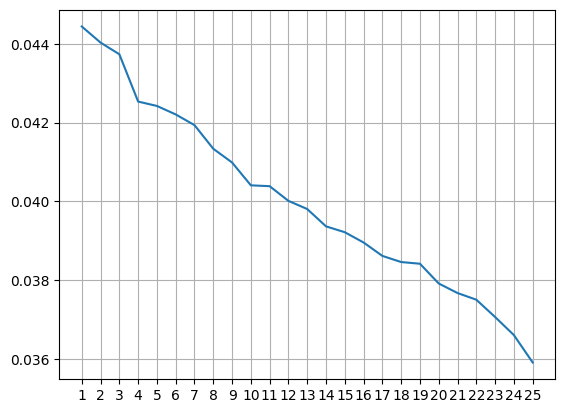

In [56]:
X=data1_Normalise.drop(columns=col)
pca = PCA()
principal_components = pca.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)
cumulative_variance_percentage = cumulative_variance * 100

sns.lineplot(x=np.linspace(1,25,25), y=variance_ratio)
plt.xticks(np.linspace(1,25,25),np.linspace(1,25,25).astype(int))
plt.grid(True)
cumulative_variance_percentage

In [57]:
pca=PCA(n_components=15)
data1_Normalise_pca=pd.DataFrame(pca.fit_transform(X),columns=[f'x{i}' for i in range(1,16)])
for i in col:
    data1_Normalise_pca[i]=data1_Normalise[i]
data1_Normalise_pca

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,max1,min1,max2,min2
0,-0.246579,0.351467,-0.515050,0.250827,-0.592958,0.064126,-0.030600,-0.050672,0.478511,-0.201533,0.067890,-0.128369,0.216091,-0.178242,0.197635,1796.000854,1654.771026,3613.337742,3305.212915
1,-0.177783,-0.487932,0.297394,0.322446,-0.107243,0.233532,0.214425,-0.026656,0.399480,-0.035633,-0.137645,0.319131,0.623853,0.307900,-0.169614,1233.971291,1105.635777,2464.261403,2228.446658
2,-0.470393,0.576807,0.151928,-0.012216,-0.273368,-0.091271,0.247771,0.440360,0.203910,-0.139033,0.031977,0.016686,-0.115037,-0.234956,-0.094822,3297.337733,3282.447970,6896.681903,6286.698912
3,-0.542672,-0.077187,-0.224659,-0.608113,0.152952,-0.252742,-0.062749,-0.104276,-0.393200,0.194742,-0.120833,-0.140624,-0.639974,0.069647,0.160374,12469.548731,11327.556295,24769.068850,22833.007909
4,0.168338,-0.003609,0.135319,0.020688,-0.324290,0.224616,0.406580,0.311325,0.319737,-0.061360,-0.344754,0.000846,-0.087275,0.331728,0.018153,2894.966989,2588.495364,5551.941588,5405.104199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.237153,0.030351,-0.266003,-0.198177,0.296639,-0.089804,-0.157314,0.478241,0.574882,0.268787,0.429020,-0.244461,-0.057204,-0.074992,-0.078999,3289.106310,3143.049944,6704.036423,6171.571240
7996,0.050074,0.221496,0.118196,0.020826,0.109830,-0.017928,-0.663111,0.018295,0.098162,-0.057699,0.350294,0.527495,0.542430,-0.627967,-0.038454,1258.044081,1174.935992,2466.202447,2391.019785
7997,0.172563,0.203796,-0.246457,-0.162863,-0.167938,0.141004,-0.224223,0.446463,0.057082,0.358572,0.352558,-0.378302,0.110288,0.225790,-0.399805,1866.364148,1801.097997,3775.425184,3552.769625
7998,0.241354,0.022249,0.190674,-0.105831,0.407016,0.568652,-0.288541,0.410922,-0.354990,0.246434,0.482248,0.010423,0.131631,0.089713,-0.466972,22087.583848,20603.146579,43142.565411,42145.985757


In [58]:
X=data1_Normalise_pca.drop(columns=col).to_numpy()
max1=data1_Normalise_pca['max1'].to_numpy()
min1=data1_Normalise_pca['min1'].to_numpy()
max2=data1_Normalise_pca['max2'].to_numpy()
min2=data1_Normalise_pca['min2'].to_numpy()
x_max1_data1_Normalise_train_pca, x_max1_data1_Normalise_test_pca, max1_data1_Normalise_train_pca, max1_data1_Normalise_test_pca = tts(X,max1,test_size=0.2)
x_min1_data1_Normalise_train_pca, x_min1_data1_Normalise_test_pca, min1_data1_Normalise_train_pca, min1_data1_Normalise_test_pca = tts(X,min1,test_size=0.2)
x_max2_data1_Normalise_train_pca, x_max2_data1_Normalise_test_pca, max2_data1_Normalise_train_pca, max2_data1_Normalise_test_pca = tts(X,max2,test_size=0.2)
x_min2_data1_Normalise_train_pca, x_min2_data1_Normalise_test_pca, min2_data1_Normalise_train_pca, min2_data1_Normalise_test_pca = tts(X,min2,test_size=0.2)

In [59]:
X=data1_Normalise.drop(columns=col).to_numpy()
max1=data1_Normalise['max1'].to_numpy()
min1=data1_Normalise['min1'].to_numpy()
max2=data1_Normalise['max2'].to_numpy()
min2=data1_Normalise['min2'].to_numpy()
x_max1_data1_Normalise_train, x_max1_data1_Normalise_test, max1_data1_Normalise_train, max1_data1_Normalise_test = tts(X,max1,test_size=0.2)
x_min1_data1_Normalise_train, x_min1_data1_Normalise_test, min1_data1_Normalise_train, min1_data1_Normalise_test = tts(X,min1,test_size=0.2)
x_max2_data1_Normalise_train, x_max2_data1_Normalise_test, max2_data1_Normalise_train, max2_data1_Normalise_test = tts(X,max2,test_size=0.2)
x_min2_data1_Normalise_train, x_min2_data1_Normalise_test, min2_data1_Normalise_train, min2_data1_Normalise_test = tts(X,min2,test_size=0.2)

## Standardising data1 & PCA with tts

In [11]:
scaler = ss()
colnew=col_ms+['length','alpha','beta','flux','ja']
data1_Standerdize = data1.copy(deep=True)
data_to_scale = data1_Standerdize[colnew]
data_scaled = scaler.fit_transform(data_to_scale)
data1_Standerdize[colnew] = data_scaled
data1_Standerdize

,length,alpha,beta,flux,ja,max1,min1,max2,min2,ms1,...,ms11,ms12,ms13,ms14,ms15,ms16,ms17,ms18,ms19,ms20
0,0.683795,-1.679334,0.942212,-0.569556,-0.607651,8761.048455,8724.831598,17645.703943,17325.571800,0.213768,...,1.552795,-0.841342,-0.609405,-0.178568,-0.644332,1.362048,-0.986507,1.608183,1.529183,1.299825
1,-1.174887,0.036193,1.007171,0.915816,1.519251,30261.819111,27673.873145,58485.735757,57169.840233,0.121154,...,0.414076,1.623407,1.346545,0.075694,-1.106669,-1.505763,-0.895737,1.424351,-0.749911,0.210652
2,1.328622,-1.726160,0.634084,-0.740068,1.126827,5705.949563,5340.270545,11285.606444,10805.147664,-0.914748,...,0.763652,0.654865,0.585329,1.639061,0.227804,-0.013401,1.164054,-0.410505,1.356262,0.863469
3,0.416877,-0.963172,-1.138380,-1.658952,0.066582,4935.107964,4670.055929,9940.021351,9287.187535,-0.348775,...,-1.717994,-1.452322,0.534126,0.958738,-1.597027,0.911588,0.780025,1.171148,1.211009,1.468183
4,0.448161,0.265934,0.836320,0.039341,1.277720,492.969310,477.546060,990.839622,948.770304,-0.118956,...,0.275630,1.151286,-0.681089,-0.037693,0.056179,0.536778,1.356069,-1.357415,0.581578,-0.589908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1.610834,-0.143002,-0.731217,0.064434,-1.563011,406.561256,390.708672,805.502554,787.732198,1.517221,...,-0.475440,-0.112332,-0.984892,1.408851,-0.963064,0.478322,-0.187029,1.566561,-1.178754,0.640137
3996,-0.004836,-1.369340,-0.508140,0.208952,-0.080708,4994.390641,4862.627123,10073.970746,9633.634253,0.035401,...,-1.742222,-1.205847,1.367026,-0.573705,-0.644332,1.657770,-0.497743,-0.493750,-1.621430,-0.390627
3997,-0.355697,1.395524,0.175462,-0.108649,-1.135338,1803.331343,1783.673945,3717.884642,3450.073022,0.031971,...,0.016043,0.748595,-0.759600,1.697472,-1.702103,0.378602,-0.881772,0.765329,-0.224232,0.162550
3998,0.081862,-1.645683,-1.484914,0.556244,0.542494,1689.320337,1673.902295,3391.765202,3334.637079,-0.647197,...,-0.150092,0.609736,0.626291,1.604701,0.171764,-1.364780,0.120194,-1.385163,-0.908998,-1.672209


array([  4.44116362,   8.82711739,  13.16431399,  17.44408481,
        21.69536163,  25.92450338,  30.11927623,  34.23443928,
        38.33086562,  42.38533669,  46.41890534,  50.41689024,
        54.39717953,  58.32808821,  62.23587755,  66.10683195,
        69.97346877,  73.83615664,  77.69329693,  81.48924075,
        85.26186738,  89.01127088,  92.73811413,  96.40996919,
       100.        ])

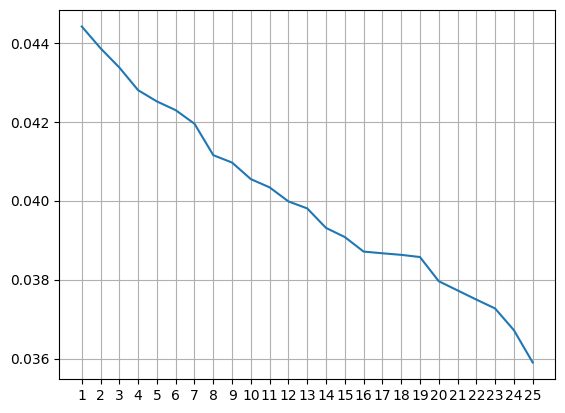

In [61]:
X=data1_Standerdize.drop(columns=col)
pca = PCA()
principal_components = pca.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)
cumulative_variance_percentage = cumulative_variance * 100

sns.lineplot(x=np.linspace(1,25,25), y=variance_ratio)
plt.xticks(np.linspace(1,25,25),np.linspace(1,25,25).astype(int))
plt.grid(True)
cumulative_variance_percentage

In [62]:
pca=PCA(n_components=18)
data1_Standerdize_pca=pd.DataFrame(pca.fit_transform(X),columns=[f'x{i}' for i in range(1,19)])
for i in col:
    data1_Standerdize_pca[i]=data1_Standerdize[i]
data1_Standerdize_pca

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,max1,min1,max2,min2
0,-0.616675,-0.770881,-2.196801,-1.861149,-1.276913,-0.069352,0.059656,-1.064288,1.422871,0.351916,...,0.163180,-1.422432,-1.103172,0.884409,-0.627768,0.806214,1796.000854,1654.771026,3613.337742,3305.212915
1,-0.716797,1.242130,1.436497,-0.971957,0.214097,0.844671,0.928891,-0.721445,1.447139,0.401345,...,1.916751,-0.536402,-0.414949,0.459687,-0.747750,1.696846,1233.971291,1105.635777,2464.261403,2228.446658
2,-1.616811,-2.102520,-0.270147,-0.806104,-0.419624,-0.606105,0.736789,-1.682033,-0.468488,-0.356592,...,-0.486077,-0.109963,-0.546120,0.506025,1.090772,0.054935,3297.337733,3282.447970,6896.681903,6286.698912
3,-1.798300,0.665934,-0.563361,1.853493,-0.721191,-1.249368,0.059803,1.127463,-1.133643,-0.566254,...,-1.629079,0.771111,0.943233,-0.745478,-1.101402,-0.854055,12469.548731,11327.556295,24769.068850,22833.007909
4,0.569801,-0.317912,0.495502,-0.749078,-0.506373,0.446763,1.706644,-1.457478,0.339998,0.242879,...,0.149798,0.654022,1.456056,-0.732339,0.013565,-0.698301,2894.966989,2588.495364,5551.941588,5405.104199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.638153,0.410340,-0.771769,1.127667,0.329221,-0.587836,-0.376865,-2.210745,0.568226,-1.581750,...,-0.167091,0.071705,-0.665653,0.055371,-0.526536,1.175756,3289.106310,3143.049944,6704.036423,6171.571240
7996,0.112024,-0.646261,-0.014792,0.527749,-0.101389,0.422688,-2.432283,-0.393947,0.423586,-0.329545,...,0.340728,-1.496910,-2.080447,0.637508,1.613403,1.053127,1258.044081,1174.935992,2466.202447,2391.019785
7997,0.971733,-0.279764,-0.898362,0.097950,-0.976561,0.255256,-0.503796,-1.298136,-0.624664,-1.633512,...,1.280703,1.337538,0.457491,0.669230,0.622103,0.699457,1866.364148,1801.097997,3775.425184,3552.769625
7998,0.803698,0.012987,0.482610,1.407371,0.402066,2.027108,-0.596329,-0.371756,-1.766234,-0.889870,...,0.912385,1.629126,-0.926379,-0.253870,-0.402679,0.951961,22087.583848,20603.146579,43142.565411,42145.985757


In [13]:
X=data1_Standerdize_pca.drop(columns=col).to_numpy()
max1=data1_Standerdize_pca['max1'].to_numpy()
min1=data1_Standerdize_pca['min1'].to_numpy()
max2=data1_Standerdize_pca['max2'].to_numpy()
min2=data1_Standerdize_pca['min2'].to_numpy()
x_max1_data1_Standerdize_train_pca, x_max1_data1_Standerdize_test_pca, max1_data1_Standerdize_train_pca, max1_data1_Standerdize_test_pca = tts(X,max1,test_size=0.2)
x_min1_data1_Standerdize_train_pca, x_min1_data1_Standerdize_test_pca, min1_data1_Standerdize_train_pca, min1_data1_Standerdize_test_pca = tts(X,min1,test_size=0.2)
x_max2_data1_Standerdize_train_pca, x_max2_data1_Standerdize_test_pca, max2_data1_Standerdize_train_pca, max2_data1_Standerdize_test_pca = tts(X,max2,test_size=0.2)
x_min2_data1_Standerdize_train_pca, x_min2_data1_Standerdize_test_pca, min2_data1_Standerdize_train_pca, min2_data1_Standerdize_test_pca = tts(X,min2,test_size=0.2)

NameError: name 'data1_Standerdize_pca' is not defined

In [14]:
col=['max1','min1','max2','min2']
X=data1_Standerdize.drop(columns=col).to_numpy()
max1=data1_Standerdize['max1'].to_numpy()
min1=data1_Standerdize['min1'].to_numpy()
max2=data1_Standerdize['max2'].to_numpy()
min2=data1_Standerdize['min2'].to_numpy()
x_max1_data1_Standerdize_train, x_max1_data1_Standerdize_test, max1_data1_Standerdize_train, max1_data1_Standerdize_test = tts(X,max1,test_size=0.2)
x_min1_data1_Standerdize_train, x_min1_data1_Standerdize_test, min1_data1_Standerdize_train, min1_data1_Standerdize_test = tts(X,min1,test_size=0.2)
x_max2_data1_Standerdize_train, x_max2_data1_Standerdize_test, max2_data1_Standerdize_train, max2_data1_Standerdize_test = tts(X,max2,test_size=0.2)
x_min2_data1_Standerdize_train, x_min2_data1_Standerdize_test, min2_data1_Standerdize_train, min2_data1_Standerdize_test = tts(X,min2,test_size=0.2)

# MODEL TRAINING

## Random Forest Regressor

### max1

#### Original data after PCA

In [65]:
rfr_max1_data = rfr()
rfr_max1_data.fit(x_max1_data_train,max1_data_train)
rfr_max1_data.score(x_max1_data_test,max1_data_test)

-0.06146119049498311

#### Normalised data after PCA

In [66]:
rfr_max1_data_Normalise = rfr()
rfr_max1_data_Normalise.fit(x_max1_data_Normalise_train,max1_data_Normalise_train)
rfr_max1_data_Normalise.score(x_max1_data_Normalise_test,max1_data_Normalise_test)

KeyboardInterrupt: 

#### data1 after PCA

In [ ]:
rfr_max1_data1 = rfr()
rfr_max1_data1.fit(x_max1_data1_train,max1_data1_train)
rfr_max1_data1.score(x_max1_data1_test,max1_data1_test)

-0.012975148373031375

#### Normalised data1 after PCA

In [ ]:
rfr_max1_data1_Normalise_pca = rfr()
rfr_max1_data1_Normalise_pca.fit(x_max1_data1_Normalise_train_pca,max1_data1_Normalise_train_pca)
rfr_max1_data1_Normalise_pca.score(x_max1_data1_Normalise_test_pca,max1_data1_Normalise_test_pca)

0.06968629903849588

#### Standardised data1 after PCA

In [ ]:
rfr_max1_data1_Standerdize_pca = rfr()
rfr_max1_data1_Standerdize_pca.fit(x_max1_data1_Standerdize_train_pca,max1_data1_Standerdize_train_pca)
rfr_max1_data1_Standerdize_pca.score(x_max1_data1_Standerdize_test_pca,max1_data1_Standerdize_test_pca)

0.11343880981126497

In [ ]:
for i in [200,400,600,1000,2000]:
    rfr_max1_data1_Standerdize_pca = rfr(n_estimators=i)
    rfr_max1_data1_Standerdize_pca.fit(x_max1_data1_Standerdize_train_pca,max1_data1_Standerdize_train_pca)
    print(i,":",rfr_max1_data1_Standerdize_pca.score(x_max1_data1_Standerdize_test_pca,max1_data1_Standerdize_test_pca))

200 : 0.13326131543281383
400 : 0.1302590404063223
600 : 0.1366212881767307
1000 : 0.12965001765832085
2000 : 0.13626809748914714


#### Standardised data1 without PCA

In [ ]:
rfr_max1_data1_Standerdize = rfr()
rfr_max1_data1_Standerdize.fit(x_max1_data1_Standerdize_train,max1_data1_Standerdize_train)
rfr_max1_data1_Standerdize.score(x_max1_data1_Standerdize_test,max1_data1_Standerdize_test)

0.47896219418860186

In [ ]:
params={"n_estimators":[100,200,400,600,1000,2000],'max_features':['sqrt','log2',1,2,4],'bootstrap':[True,False]}
tuner=gscv(estimator=rfr_max1_data1_Standerdize,param_grid=params)
tuner.fit(x_max1_data1_Standerdize_train,max1_data1_Standerdize_train)
#print(i,":",rfr_max1_data1_Standerdize.score(x_max1_data1_Standerdize_test,max1_data1_Standerdize_test))
tuner.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=2000)

In [ ]:
tuner.best_score_

0.5825515665349229

#### Normalised data1 without PCA

In [ ]:
rfr_max1_data1_Normalise = rfr()
rfr_max1_data1_Normalise.fit(x_max1_data1_Normalise_train,max1_data1_Normalise_train)
rfr_max1_data1_Normalise.score(x_max1_data1_Normalise_test,max1_data1_Normalise_test)

0.6508142776192558

In [ ]:
params={"n_estimators":[100,200,400,600,1000,2000],'max_features':['sqrt','log2',1,2,4],'bootstrap':[True,False]}
tuner=gscv(estimator=rfr_max1_data1_Normalise,param_grid=params)
tuner.fit(x_max1_data1_Normalise_train,max1_data1_Normalise_train)
tuner.cv_results_

{'mean_fit_time': array([  2.74739766,   5.36824236,  10.71084733,  15.86013484,
         26.76106644,  54.00852256,   2.29876394,   4.5054493 ,
          8.9047287 ,  13.33315687,  51.67652102, 111.5154223 ,
          2.16528974,   4.17237773,   8.31367731,  12.67479258,
         20.96787772,  29.22289863,   1.20147734,   2.42311273,
          4.82890463,   7.30814333,  12.42305565,  24.00460887,
          2.02933455,   5.46794877,  22.26373606,  33.2946712 ,
         56.34856253, 113.04424648,   6.28889213,  12.59768901,
         25.35874219,  38.18845015,  62.35455141,  98.18298712,
          3.6219161 ,   7.24388947,  14.63858914,  21.87641439,
         36.60071917,  74.20650663,   1.4187767 ,   2.67385511,
          3.16723905,   4.70075397,   8.07210283,  19.920011  ,
          2.17419605,   4.42251015,   8.84575944,  13.26094422,
         15.22135949,  16.25887914,   1.17355781,   2.37983575,
          4.73800259,   7.07003493,  11.87996702,  26.46382017]),
 'std_fit_time': arra

In [ ]:
tuner.best_params_,tuner.best_score_,tuner.best_estimator_

({'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 1000},
 0.6348432003055222,
 RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=1000))

In [ ]:
rfr_max1_data1_Normalise=tuner.best_estimator_
rfr_max1_data1_Normalise.fit(x_max1_data1_Normalise_train,max1_data1_Normalise_train)
rfr_max1_data1_Normalise.score(x_max1_data1_Normalise_test,max1_data1_Normalise_test)

0.6566885206488631

In [ ]:
rfr_max1_data1_Normalise.feature_importances_[:6], rfr_max1_data1_Normalise.feature_importances_[6:].sum(), data1_Normalise.columns

(array([0.42919451, 0.07672714, 0.04122303, 0.05518538, 0.01650983,
        0.01744511]),
 0.3637150112689436,
 Index(['length', 'alpha', 'beta', 'flux', 'ja', 'max1', 'min1', 'max2', 'min2',
        'ms1', 'ms2', 'ms3', 'ms4', 'ms5', 'ms6', 'ms7', 'ms8', 'ms9', 'ms10',
        'ms11', 'ms12', 'ms13', 'ms14', 'ms15', 'ms16', 'ms17', 'ms18', 'ms19',
        'ms20'],
       dtype='object'))

### min1

#### Normalised data1 without PCA

In [ ]:
rfr_min1_data1_Normalise = rfr()
rfr_min1_data1_Normalise.fit(x_min1_data1_Normalise_train,min1_data1_Normalise_train)
rfr_min1_data1_Normalise.score(x_min1_data1_Normalise_test,min1_data1_Normalise_test)

0.5566310697185831

In [ ]:
params={"n_estimators":[100,200,400,600,1000,2000],'max_features':['sqrt','log2',1,2,4],'bootstrap':[True,False]}
tuner=gscv(estimator=rfr_min1_data1_Normalise,param_grid=params)
tuner.fit(x_min1_data1_Normalise_train,min1_data1_Normalise_train)
tuner.best_score_,tuner.best_estimator_

(0.6431264159234162,
 RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=2000))

In [ ]:
rfr_min1_data1_Normalise=tuner.best_estimator_
rfr_min1_data1_Normalise.fit(x_min1_data1_Normalise_train,min1_data1_Normalise_train)
rfr_min1_data1_Normalise.score(x_min1_data1_Normalise_test,min1_data1_Normalise_test)

0.6278409018475389

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV


def Artificial_Neural_Network(X_train,Y_train,X_test,Y_test):

    def create_model(optimizer='adam', activation='relu', neurons=64):
        model = Sequential()
        model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
        model.add(Dense(neurons, activation=activation))
        model.add(Dense(neurons, activation=activation))
        model.add(Dense(neurons, activation=activation))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer=optimizer)
        return model

    model = KerasRegressor(build_fn=create_model, verbose=0)

    parameters = {
        'optimizer': ['RMSprop', 'Adagrad', 'Adam'],
        'activation': ['relu','elu'],
        'epochs': [2000],
    }

    Stopping_Epochs = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
    grid_search = GridSearchCV(model, param_grid=parameters, scoring='r2', cv=5)
    grid_result = grid_search.fit(X_train,Y_train,validation_data=(X_test, Y_test),callbacks=[Stopping_Epochs])

    best_model = grid_result.best_estimator_.model
    best_history = best_model.history.history

    plt.plot(best_history['loss'], label='training loss')
    plt.plot(best_history['val_loss'], label='Testing loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    y_pred = best_model.predict(X_test)
    y_pred = np.squeeze(y_pred) 

    y_true = np.squeeze(Y_test)  
    ssr = np.sum((y_true - y_pred)**2)
    sst = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (ssr / sst)
    print("Best R-squared: %.2f" % r2)

    print("Best Parameters: ", grid_result.best_params_)


C:\Users\Anshu raj\AppData\Local\Temp\ipykernel_33924\3359975580.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Epoch 142: early stopping
Epoch 100: early stopping
Epoch 84: early stopping
Epoch 91: early stopping
Epoch 150: early stopping
Epoch 128: early stopping
Epoch 86: early stopping
Epoch 101: early stopping
Epoch 97: early stopping
Epoch 98: early stopping
Epoch 79: early stopping
Epoch 70: early stopping
Epoch 90: early stopping
Epoch 79: early stopping
Epoch 75: early stopping
Epoch 104: early stopping
Epoch 56: early stopping
Epoch 152: early stopping
Epoch 63: early stopping
Epoch 66: early stopping
Epoch 61: early stopping


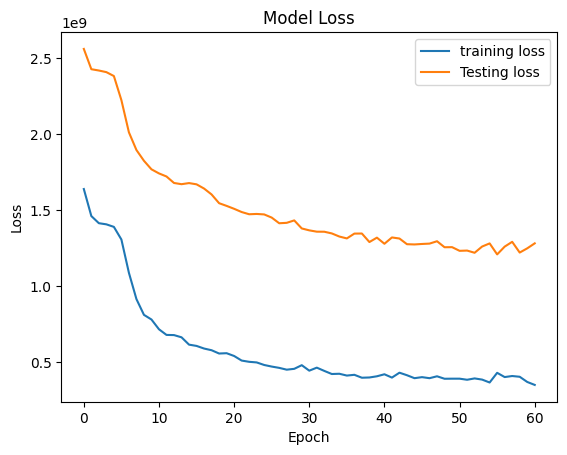

25/25 [==============================] - 0s 1ms/step
Best R-squared: 0.47
Best Parameters:  {'activation': 'elu', 'epochs': 2000, 'optimizer': 'Adam'}


In [ ]:
Artificial_Neural_Network(x_max1_data1_Normalise_train,max1_data1_Normalise_train,x_max1_data1_Normalise_test,max1_data1_Normalise_test)

In [98]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

def Artificial_Neural_Network(X_train,Y_train,X_test,Y_test):

    def create_model(optimizer='adam', activation='relu'):
        model = Sequential()
        model.add(Dense(128, input_dim=X_train.shape[1], activation=activation))
        model.add(Dense(128, activation=activation))
        model.add(Dense(64, activation=activation))
        model.add(Dense(64, activation=activation))
        model.add(Dense(32, activation=activation))
        model.add(Dense(32, activation=activation))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer=optimizer)
        return model

    # model = KerasRegressor(build_fn=create_model, verbose=0)
    
    Stopping_Epochs = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

    
    # optimizers=['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']  #Adam
    optimizers=['Adam']
    # activations=["leaky_relu",'relu','elu','tanh']  # RElu
    activations=['relu']

    best_R2=0
    best_optimizer=""
    best_activation=""
    history=0
    for i in optimizers:
        for j in activations:
            model=create_model(i,j)
            his = model.fit(X_train, Y_train, epochs=500, batch_size=50, validation_data=(X_test, Y_test), callbacks=[Stopping_Epochs])
            y_pred=model.predict(X_test)
            r2 = r2_score(Y_test, y_pred)
        
            if r2 > best_R2:
                best_R2 = r2
                best_optimizer = i
                best_activation = j
                history=his

    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='testing loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    print("Best R2 score :",best_R2)
    print("Best Optimiser :",best_optimizer)
    print("Best Activation : ",best_activation)

Epoch 1/500
128/128 [==============================] - 2s 5ms/step - loss: 1717618304.0000 - val_loss: 2841705472.0000
Epoch 2/500
128/128 [==============================] - 0s 3ms/step - loss: 1571516544.0000 - val_loss: 2794586880.0000
Epoch 3/500
128/128 [==============================] - 0s 3ms/step - loss: 1499646336.0000 - val_loss: 2653196800.0000
Epoch 4/500
128/128 [==============================] - 0s 3ms/step - loss: 1211817600.0000 - val_loss: 2095075968.0000
Epoch 5/500
128/128 [==============================] - 1s 5ms/step - loss: 902472512.0000 - val_loss: 1762954624.0000
Epoch 6/500
128/128 [==============================] - 0s 4ms/step - loss: 726991424.0000 - val_loss: 1591504896.0000
Epoch 7/500
128/128 [==============================] - 0s 3ms/step - loss: 634675392.0000 - val_loss: 1462860160.0000
Epoch 8/500
128/128 [==============================] - 0s 3ms/step - loss: 562099840.0000 - val_loss: 1253158272.0000
Epoch 9/500
128/128 [==============================]

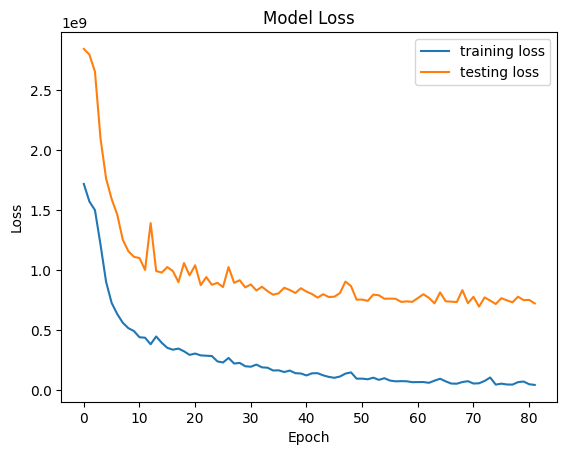

Best R2 score : 0.745980379849147
Best Optimiser : Adam
Best Activation :  relu


In [99]:
Artificial_Neural_Network(x_max1_data1_Normalise_train,max1_data1_Normalise_train,x_max1_data1_Normalise_test,max1_data1_Normalise_test)

In [163]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

def Artificial_Neural_Network(X_train,Y_train,X_test,Y_test):

    def create_model(optimizer='adam', activation='relu'):
        model = Sequential()
        model.add(Dense(128, input_dim=X_train.shape[1], activation=activation))
        # model.add(Dense(128, activation=activation))
        model.add(Dense(64, activation=activation))
        # model.add(Dense(64, activation=activation))
        # model.add(Dense(32, activation=activation))
        model.add(Dense(32, activation=activation))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer=optimizer)
        return model

    # model = KerasRegressor(build_fn=create_model, verbose=0)
    
    Stopping_Epochs = EarlyStopping(monitor='loss', patience=5, verbose=1)

    
    # optimizers=['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']  #Adam
    optimizers=['Adamax']
    # activations=["leaky_relu",'relu','elu','tanh']  # RElu
    activations=['leaky_relu']

    best_R2=0
    best_r2_train=0
    best_optimizer=""
    best_activation=""
    history=0
    best_epoch=0
    for i in optimizers:
        for j in activations:
            model=create_model(i,j)
            his = model.fit(X_train, Y_train, epochs=500, batch_size=25)
            y_pred=model.predict(X_test)
            r2 = r2_score(Y_test, y_pred)
            y_pred_1=model.predict(X_train)
            r2_train = r2_score(Y_train, y_pred_1)
            best_epoch = np.argmin(his.history['loss']) + 1

        
            if r2 > best_R2:
                best_R2 = r2
                best_r2_train=r2_train
                best_optimizer = i
                best_activation = j
                history=his
                
            if r2_train > best_R2:
                best_R2_train = r2

    plt.plot(history.history['loss'], label='training loss')
    # plt.plot(history.history['val_loss'], label='testing loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    print("Best R2 score :",best_R2)
    print("Best R2 score train :",best_r2_train)
    print("Best Optimiser :",best_optimizer)
    print("Best Activation : ",best_activation)
    print(best_epoch)


Epoch 1/500
256/256 [==============================] - 1s 1ms/step - loss: 2053840384.0000
Epoch 2/500
256/256 [==============================] - 0s 1ms/step - loss: 2049420672.0000
Epoch 3/500
256/256 [==============================] - 0s 1ms/step - loss: 2031509120.0000
Epoch 4/500
256/256 [==============================] - 0s 1ms/step - loss: 1992328832.0000
Epoch 5/500
256/256 [==============================] - 0s 1ms/step - loss: 1931478528.0000
Epoch 6/500
256/256 [==============================] - 0s 2ms/step - loss: 1845658240.0000
Epoch 7/500
256/256 [==============================] - 0s 2ms/step - loss: 1740008832.0000
Epoch 8/500
256/256 [==============================] - 0s 2ms/step - loss: 1650510848.0000
Epoch 9/500
256/256 [==============================] - 0s 2ms/step - loss: 1584876032.0000
Epoch 10/500
256/256 [==============================] - 0s 1ms/step - loss: 1527142656.0000
Epoch 11/500
256/256 [==============================] - 0s 1ms/step - loss: 1489345536.00

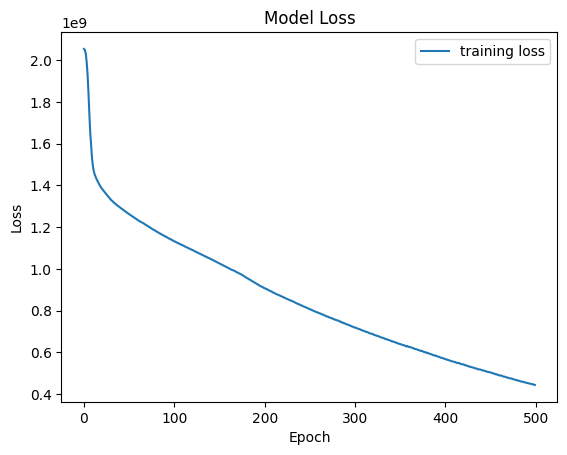

Best R2 score : 0.7566570641555763
Best R2 score train : 0.7606583998740011
Best Optimiser : Adamax
Best Activation :  leaky_relu
500


In [164]:
# Artificial_Neural_Network(x_max1_data1_Normalise_train,max1_data1_Normalise_train,x_max1_data1_Normalise_test,max1_data1_Normalise_test)
Artificial_Neural_Network(x_max1_data1_Standerdize_train,max1_data1_Standerdize_train,x_max1_data1_Standerdize_test,max1_data1_Standerdize_test)

In [166]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

def Artificial_Neural_Network(X_train,Y_train,X_test,Y_test):

    def create_model(optimizer='adam', activation='relu'):
        model = Sequential()
        model.add(Dense(128, input_dim=X_train.shape[1], activation=activation))
        # model.add(Dense(128, activation=activation))
        model.add(Dense(64, activation=activation))
        # model.add(Dense(64, activation=activation))
        # model.add(Dense(32, activation=activation))
        model.add(Dense(32, activation=activation))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer=optimizer)
        return model

    # model = KerasRegressor(build_fn=create_model, verbose=0)
    
    Stopping_Epochs = EarlyStopping(monitor='loss', patience=5, verbose=1)

    
    optimizers=['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']  
    # optimizers=['Adamax']
    activations=["leaky_relu",'relu','elu','tanh'] 
    # activations=['leaky_relu']

    best_R2=0
    best_r2_train=0
    best_optimizer=""
    best_activation=""
    history=0
    best_epoch=[]
    for i in optimizers:
        for j in activations:
            model=create_model(i,j)
            his = model.fit(X_train, Y_train, epochs=2000, batch_size=25)
            y_pred=model.predict(X_test)
            r2 = r2_score(Y_test, y_pred)
            y_pred_1=model.predict(X_train)
            r2_train = r2_score(Y_train, y_pred_1)
            best_epoch.append(np.argmin(his.history['loss']) + 1)

        
            if r2 > best_R2:
                best_R2 = r2
                best_r2_train=r2_train
                best_optimizer = i
                best_activation = j
                history=his
                
            if r2_train > best_R2:
                best_R2_train = r2

    plt.plot(history.history['loss'], label='training loss')
    # plt.plot(history.history['val_loss'], label='testing loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    print("Best R2 score :",best_R2)
    print("Best R2 score train :",best_r2_train)
    print("Best Optimiser :",best_optimizer)
    print("Best Activation : ",best_activation)
    print(best_epoch)


In [167]:
Artificial_Neural_Network(x_max1_data1_Standerdize_train,max1_data1_Standerdize_train,x_max1_data1_Standerdize_test,max1_data1_Standerdize_test)

Epoch 1/2000
256/256 [==============================] - 1s 1ms/step - loss: 2040851200.0000
Epoch 2/2000
256/256 [==============================] - 0s 1ms/step - loss: 1869159296.0000
Epoch 3/2000
256/256 [==============================] - 0s 1ms/step - loss: 1549186816.0000
Epoch 4/2000
256/256 [==============================] - 0s 1ms/step - loss: 1433046016.0000
Epoch 5/2000
256/256 [==============================] - 0s 1ms/step - loss: 1397910528.0000
Epoch 6/2000
256/256 [==============================] - 0s 1ms/step - loss: 1374383744.0000
Epoch 7/2000
256/256 [==============================] - 0s 1ms/step - loss: 1358666368.0000
Epoch 8/2000
256/256 [==============================] - 0s 1ms/step - loss: 1341140096.0000
Epoch 9/2000
256/256 [==============================] - 1s 2ms/step - loss: 1330897024.0000
Epoch 10/2000
256/256 [==============================] - 0s 2ms/step - loss: 1319072640.0000
Epoch 11/2000
256/256 [==============================] - 0s 2ms/step - loss: 13

In [ ]:
# Import the necessary libraries
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score


param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.1, 0.05, 0.01],  # Learning rate
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'min_samples_split': [2, 3, 4],  # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 3],  # Minimum number of samples required at a leaf
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider for best split
    'subsample': [1.0, 0.8, 0.6]  # Fraction of samples used for fitting individual base learners
}

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, scoring='r2', cv=5)

# Fit the model using GridSearchCV
grid_search.fit(x_min1_data1_Normalise_train,min1_data1_Normalise_train )

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_min1_data1_Normalise_test)

# Calculate the R2 score
r2 = r2_score(min1_data1_Normalise_test, y_pred)
print("Best R2 Score:", r2)
print("Best Hyperparameters:", best_params)


KeyboardInterrupt: 

#### Standardised data1 without PCA

In [ ]:
rfr_min1_data1_Standerdize = rfr()
rfr_min1_data1_Standerdize.fit(x_min1_data1_Standerdize_train,min1_data1_Standerdize_train)
rfr_min1_data1_Standerdize.score(x_min1_data1_Standerdize_test,min1_data1_Standerdize_test)

0.7085078500525097

In [ ]:
params={"n_estimators":[100,200,400,600,1000,2000],'max_features':['sqrt','log2',1,2,4],'bootstrap':[True,False]}
tuner=gscv(estimator=rfr_min1_data1_Standerdize,param_grid=params)
tuner.fit(x_min1_data1_Standerdize_train,min1_data1_Standerdize_train)
tuner.best_score_,tuner.best_estimator_

In [ ]:
rfr_min1_data1_Standerdize=tuner.best_estimator_
rfr_min1_data1_Standerdize.fit(x_min1_data1_Standerdize_train,min1_data1_Standerdize_train)
rfr_min1_data1_Standerdize.score(x_min1_data1_Standerdize_test,min1_data1_Standerdize_test)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

def create_model(optimizer='adam', activation='relu', neurons=64):
    model = Sequential()
    model.add(Dense(neurons, input_dim=x_min1_data1_Standerdize_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer=optimizer)
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)

parameters = {
    'optimizer': ['Adamax'],
    'activation': ['relu','elu','tanh'],
    'neurons': [64,128,150],
    'epochs': [2000,3000,4000],
}

grid_search = GridSearchCV(model, param_grid=parameters, scoring='r2', cv=4)
grid_result = grid_search.fit(x_min1_data1_Standerdize_train, min1_data1_Standerdize_train,validation_data=(x_min1_data1_Standerdize_test, min1_data1_Standerdize_test))

# Get the best model and its training history
best_model = grid_result.best_estimator_.model
best_history = best_model.history.history

# Plot the training and validation loss
plt.plot(best_history['loss'], label='training loss')
plt.plot(best_history['val_loss'], label='Testing loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict using the best model on the test set
y_pred = best_model.predict(x_min1_data1_Standerdize_test)
y_pred = np.squeeze(y_pred)  # Convert to NumPy array and remove any extra dimensions

# Calculate R-squared score manually
y_true = np.squeeze(min1_data1_Standerdize_test)  # Convert true labels to NumPy array and remove extra dimensions
ssr = np.sum((y_true - y_pred)**2)
sst = np.sum((y_true - np.mean(y_true))**2)
r2 = 1 - (ssr / sst)
print("Best R-squared: %.2f" % r2)

# Print the best parameters
print("Best Parameters: ", grid_result.best_params_)


C:\Users\shriv\AppData\Local\Temp\ipykernel_15696\3048324237.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


KeyboardInterrupt: 